In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Step 1: Prepare the Dataset
df = pd.read_csv('kadaluarsa3.csv')
df['expiry_days_room'] = pd.to_numeric(df['expiry_days_room'], errors='coerce')
df['expiry_days_fridge'] = pd.to_numeric(df['expiry_days_fridge'], errors='coerce')
df['expiry_days_freezer'] = pd.to_numeric(df['expiry_days_freezer'], errors='coerce')
df['expired'] = df[['expiry_days_room', 'expiry_days_fridge', 'expiry_days_freezer']].apply(lambda x: x.min() <= 0, axis=1)

# One-hot encoding
label_encoder = LabelEncoder()
df['expired'] = label_encoder.fit_transform(df['expired'])

In [3]:
# Step 2: Prepare the input features (X) and target variable (y)
X = df[['expiry_days_room', 'expiry_days_fridge', 'expiry_days_freezer']].values
y = df['expired'].values

In [4]:
# Step 3: Build the Model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Step 4: Train the Model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3/3 [==============================] - 1s 8ms/step - loss: 41.8420 - accuracy: 0.0263
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 39.7013 - accuracy: 0.0263
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 37.2197 - accuracy: 0.0263
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 34.8477 - accuracy: 0.0526
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 32.6269 - accuracy: 0.0526
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 30.2353 - accuracy: 0.0658
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 28.2853 - accuracy: 0.0658
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 25.8924 - accuracy: 0.0658
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 23.6290 - accuracy: 0.0789
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 21.3167 - accuracy: 0.0789
Epoch 11/50
3/3 [===========

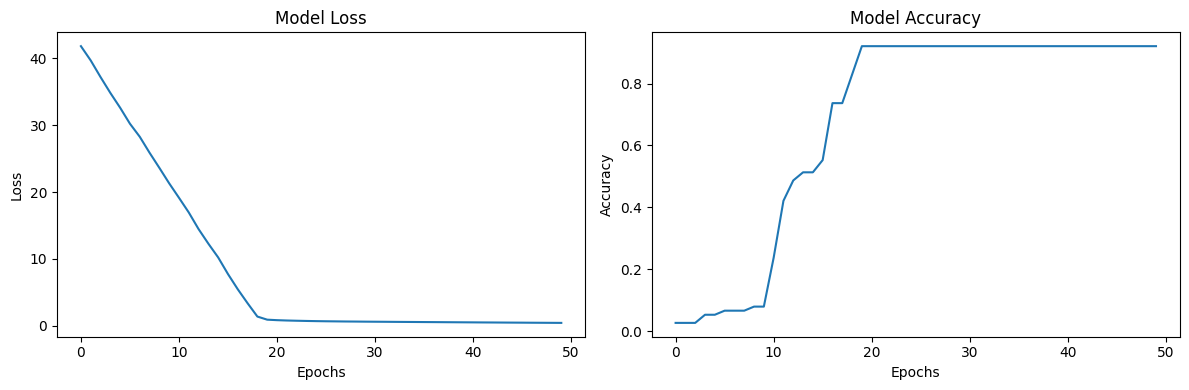

In [6]:
# Step 5: Plot Loss and Accuracy
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [12]:
# Step 6: Perform Prediction
item = input("Enter the fresh food item: ")
storage = input("Enter the storage type (room/fridge/freezer): ")
purchase_date = input("Enter the purchase date (mm-dd-yyyy): ")

storage_mapping = {
    'room': 'expiry_days_room',
    'fridge': 'expiry_days_fridge',
    'freezer': 'expiry_days_freezer'
}

item_data = df[df['item'] == item]
if item_data.empty:
    print(f"Item '{item}' is not found in the dataset.")
else:
    if storage not in storage_mapping:
        print("Invalid storage type.")
        exit()

    expiry_days = int(item_data[storage_mapping[storage]].values[0])
    if expiry_days == -1:
        print(f"Item '{item}' with storage type '{storage}' has no expiry date information.")
    else:
        expiry_date = pd.to_datetime(purchase_date) + pd.DateOffset(days=int(expiry_days))
        today = pd.Timestamp.now().normalize()

        if expiry_date >= today:
            print(f"Item '{item}' with storage type '{storage}' will expire on: {expiry_date.strftime('%m-%d-%Y')}.")
        else:
            print(f"Item '{item}' with storage type '{storage}' has expired on: {expiry_date.strftime('%m-%d-%Y')}.")


Item 'Apples' with storage type 'room' has expired on: 06-18-2022.
